# Tensorflow Model

<br>

### Definition

Inputs - 784;
<br>
First Hidden Layer - 512 units;
<br>
Second Hidden Layer - 54 units;
<br>
Output Layer - 10 units;

Learning Rate - 0.001;
<br>
Epochs - 50;
<br>
Batch Size - 1000;
<br>
Training Data Examples - 50 000;
<br>
Validation Data Examples - 10 000;
<br>
Test Data Examples - 10 000;

This model was built with the Tensorflow framework.

It was train manually using Sessions.

The weights and biases were initialized randomly and a dropout method was used on the first hidden layer.

The results were kept with Tensorboard (images below) and the model was saved and exported to be used in a webpage.

<br>

### Results

The model took 9min 43s to train over 50 epochs.

The final accuracy was 99.9% and 86.91% for the Training and Validation Data Sets, respectively, and the loss was 1.46 and 1.59, again, respectively to the Training and Validation Data Sets.

As for the performance on the Test Data Set, the results were 86.56% for the accuracy and 1.59 for the loss, virtually the same as with the Validation Data Set performance. Below there are some images of some examples where the model failed to correctly classify digits. Its possible to see that some digits would be hard to classify even for humans, although some of them, at least to my human eye, seem easily classifiable. The difference in the accuracy between the Training Data Set and the Validation / Test Data Set seems to indicate that further training or tuning of the hyperparameters are needed; since this is time consuming and not the goal of this project, both improvements were not pursued.

<br>

### Failed Classification Images

<img src="../screenshots/tf-wrong1.png">
<p style="text-align:center">Image 1 - Actual Value = 5.</p>
<p style="text-align:center">Image 1 - Model Prediction = 6.</p>

<br>

<img src="../screenshots/tf-wrong2.png">

<p style="text-align:center">Image 2 - Actual Value = 8.</p>
<p style="text-align:center">Image 2 - Model Prediction = 2.</p>

<br>

<img src="../screenshots/tf-wrong3.png">
<p style="text-align:center">Image 3 - Actual Value = 4.</p>
<p style="text-align:center">Image 3 - Model Prediction = 0.</p>

<br>

### Tensorboard

<img src="../screenshots/screenshots5.png">
<p style="text-align:center">Image 4 - Computation Graph.</p>

<br>

<img src="../screenshots/screenshots3.svg">

<p style="text-align:center">Image 5 - Accuracy.</p>

<br>

<img src="../screenshots/screenshots4.svg">
<p style="text-align:center">Image 6 - Loss.</p>

<br>

In [11]:
# IMPORTS
import tensorflow as tensorflow
import os
import numpy as numpy
import matplotlib.pyplot as pyplot
from time import strftime
from PIL import Image

In [12]:
# SEEDS
numpy.random.seed(888)
tensorflow.random.set_seed(404)

In [13]:
# CONSTANTS
X_DATA_TRAIN = '../models/data/digit_xtrain.csv'
X_DATA_TEST = '../models/data/digit_xtest.csv'
Y_DATA_TRAIN = '../models/data/digit_ytrain.csv'
Y_DATA_TEST = '../models/data/digit_ytest.csv'
LOGGING = '../models/tf-model/tensorboard/'
MODEL_BACKUP_PATH = '../models/tf-model/saved-model-tf'
INPUTS = 784
CLASSES = 10
VALIDATION_SIZE = 10000

In [14]:
# HYPER-PARAMETERS
epochs = 50
learningRate = 1e-3
firstHiddenLayerNeurons = 512
secondHiddenLayerNeurons = 64
outputLayerNeurons = 10
batchSize = 1000
dataSize = 60000 - VALIDATION_SIZE
iterations = int(dataSize / batchSize)
currentIndex = 0

In [15]:
# FUNCTIONS


# DEFINE BATCH ELEMENTS
def batchDataEntries(xData,
                     yData,
                     dataSize = dataSize,
                     batchSize = batchSize,
                     currentIndex = currentIndex):
    
    
    # define batch entries from data
    start = currentIndex
    end = start + batchSize
    currentIndex = end
    
    
    # if data is over, move on to next epoch
    if currentIndex > dataSize:
        start = 0
        end = batchSize
        currentIndex = end
    
    
    # return subsets
    # the end is not inclusive!
    return xData[start:end], yData[start:end]


# MODEL TRAINING
def modelTraining(xData,
                  yData,
                  mergedSummaries,
                  accuracy,
                  epochs = epochs,
                  iterations = iterations,
                  learningRate = learningRate):
    
    
    # global variables
    
    
    # loop through all epochs
    for epoch in range(epochs):
        
        
        # loop through all the data in every epoch, depending on batch size
        # feed a dictionaries containing the entries that will be used to train the model
        # record with filewriter
        # print accuracy
        for iteration in range(iterations):
            xDataBatch, yDataBatch = batchDataEntries(xData, yData)
            feed = {xTensor: xDataBatch, yTensor: yDataBatch}
            session.run(trainingStep, feed_dict = feed)
            
        
        # log training progress
        summaries, batchAccuracy, batchLoss = session.run(fetches = [mergedSummaries, accuracy, loss],
                                                          feed_dict = feed)
        trainFilewriter.add_summary(summaries, epoch)
        
        
        # print accuracy for every epoch
        print(f'Epoch -> {epoch}\n\nTraining Results:\nAccuracy -> {round(batchAccuracy * 100, 2)}')
        print(f'Loss -> {round(batchLoss / 1, 2)}\n')
        
        
        # validate model after every training epoch
        feed = {xTensor: xValidation, yTensor: yValidation}
        summaries, batchAccuracy, batchLoss = session.run(fetches = [mergedSummaries, accuracy, loss],
                                                          feed_dict = feed)
        validationFilewriter.add_summary(summaries, epoch)
        print(f'Validation Results:\nAccuracy -> {round(batchAccuracy * 100, 2)}')
        print(f'Loss -> {round(batchLoss / 1, 2)}')
        print('\n---------------\n')
    
    
    # log training end
    print('Training Done!\n')

In [16]:
%%time

# DATA IMPORTS
yTrain = numpy.loadtxt(Y_DATA_TRAIN, delimiter = ',', dtype = int)
yTest = numpy.loadtxt(Y_DATA_TEST, delimiter = ',', dtype = int)
xTrain = numpy.loadtxt(X_DATA_TRAIN, delimiter = ',', dtype = int)
xTest = numpy.loadtxt(X_DATA_TEST, delimiter = ',', dtype = int)

CPU times: user 1min 3s, sys: 2.89 s, total: 1min 6s
Wall time: 1min 7s


In [7]:
# DATA PREPROCESSING


# normalise data
xTrain = xTrain / 255.0
xTest = xTest / 255.0


# one hot encoding of the labels
yTest = numpy.eye(CLASSES)[yTest]
yTrain = numpy.eye(CLASSES)[yTrain]

In [8]:
# VALIDATION DATASET
xValidation = xTrain[:VALIDATION_SIZE]
yValidation = yTrain[:VALIDATION_SIZE]
xTrain = xTrain[VALIDATION_SIZE:]
yTrain = yTrain[VALIDATION_SIZE:]

In [9]:
# TENSORS
tensorflow.compat.v1.disable_eager_execution()
xTensor = tensorflow.compat.v1.placeholder(dtype = tensorflow.float32,
                                           shape = (None, INPUTS),
                                           name = 'xTensor')
yTensor = tensorflow.compat.v1.placeholder(dtype = tensorflow.float32,
                                           shape = (None, CLASSES),
                                           name = 'yTensor')

In [10]:
# SETUP LAYERS


# FIRST HIDDEN LAYER
# using python contexts to group operations together
with tensorflow.name_scope('firstHiddenLayer'):
    
    
    # generate layer one weights and biases 
    initialWeightsLayerOne = tensorflow.random.truncated_normal(shape = [INPUTS, firstHiddenLayerNeurons],
                                                                stddev = 0.1,
                                                                seed = 42)
    initialBiasesLayerOne = tensorflow.constant(value = 0.0, shape = [firstHiddenLayerNeurons])
    
    
    # store layer one weights and biases in a variable
    layerOneWeights = tensorflow.Variable(initial_value = initialWeightsLayerOne, name = 'layerOneWeights')
    layerOneBiases = tensorflow.Variable(initial_value = initialBiasesLayerOne, name = 'layerOneBiases')
    
    
    # calculate 
    layerOneNeuronsValues = tensorflow.matmul(xTensor, layerOneWeights) + layerOneBiases
    layerOneActivationValues = tensorflow.nn.relu(layerOneNeuronsValues)
    tensorflow.compat.v1.summary.histogram('weights', layerOneWeights)
    tensorflow.compat.v1.summary.histogram('biases', layerOneBiases)
    
    
# DROPOUT lAYER
with tensorflow.name_scope('dropoutLayer'):
    dropoutLayer = tensorflow.nn.dropout(layerOneActivationValues, rate = 0.8, name = 'dropoutLayer')
    
    
# SECOND HIDDEN LAYER
with tensorflow.name_scope('secondHiddenLayer'):
    initialWeightsLayerTwo = tensorflow.random.truncated_normal(shape = [firstHiddenLayerNeurons, secondHiddenLayerNeurons],
                                                                stddev = 0.1,
                                                                seed = 42)
    initialBiasesLayerTwo = tensorflow.constant(value = 0.0, shape = [secondHiddenLayerNeurons])
    layerTwoWeights = tensorflow.Variable(initial_value = initialWeightsLayerTwo, name = 'layerTwoWeights')
    layerTwoBiases = tensorflow.Variable(initial_value = initialBiasesLayerTwo, name = 'layerTwoBiases')
    layerTwoNeuronsValues = tensorflow.matmul(dropoutLayer, layerTwoWeights) + layerTwoBiases
    layerTwoActivationValues = tensorflow.nn.relu(layerTwoNeuronsValues)
    tensorflow.compat.v1.summary.histogram('weights', layerTwoWeights)
    tensorflow.compat.v1.summary.histogram('biases', layerTwoBiases)
    
    
# OUTPUT
with tensorflow.name_scope('outputLayer'):
    initialWeightsOutput = tensorflow.random.truncated_normal(shape = [secondHiddenLayerNeurons, CLASSES],
                                                                stddev = 0.1,
                                                                seed = 42)
    initialBiasesOutput = tensorflow.constant(value = 0.0, shape = [CLASSES])
    outputWeights = tensorflow.Variable(initial_value = initialWeightsOutput, name = 'outputWeights')
    outputBiases = tensorflow.Variable(initial_value = initialBiasesOutput, name = 'outputBiases')
    outputNeuronsValues = tensorflow.matmul(layerTwoActivationValues, outputWeights) + outputBiases
    outputActivationValues = tensorflow.nn.softmax(outputNeuronsValues)
    tensorflow.compat.v1.summary.histogram('weights', outputWeights)
    tensorflow.compat.v1.summary.histogram('biases', outputBiases)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
# LOSS, OPTIMISER AND TRAINING STEP
with tensorflow.name_scope('loss'):
    loss = tensorflow.reduce_mean(tensorflow.nn.softmax_cross_entropy_with_logits(labels = yTensor,
                                                                                  logits = outputActivationValues))

with tensorflow.name_scope('optimiser'):
    optimiser = tensorflow.compat.v1.train.AdamOptimizer(learning_rate = learningRate)
    trainingStep = optimiser.minimize(loss)

In [12]:
# METRICS
with tensorflow.name_scope('accuracy'):
    modelPrediction = tensorflow.argmax(outputActivationValues, axis = 1, name = 'modelPrediction')
    correctPredictions = tensorflow.equal(modelPrediction,
                                          tensorflow.argmax(yTensor, axis = 1))
    accuracy = tensorflow.reduce_mean(tensorflow.cast(correctPredictions, tensorflow.float32))

In [13]:
# NEW SESSION
session = tensorflow.compat.v1.Session()
init = tensorflow.compat.v1.global_variables_initializer()
session.run(init)

In [14]:
# TENSORBOARD
loggingPath = LOGGING + f'{strftime("%H%M")}/'
try:
    os.mkdir(loggingPath)
except OSError as error:
    print(error)
else:
    print(f'Directory Created! -> {loggingPath}')

Directory Created! -> ../models/tf-model/tensorboard/1252/


In [15]:
# TENSORBOARD SUMMARY
with tensorflow.name_scope('performance'):
    tensorflow.compat.v1.summary.scalar('accuracy', accuracy)
    tensorflow.compat.v1.summary.scalar('loss', loss)
    
with tensorflow.name_scope('images'):
    image = tensorflow.reshape(xTensor, [-1, 28, 28, 1])
    tensorflow.compat.v1.summary.image('image', image, max_outputs = 5)
    
mergedSummaries = tensorflow.compat.v1.summary.merge_all()
trainFilewriter = tensorflow.compat.v1.summary.FileWriter(loggingPath + 'train')
validationFilewriter = tensorflow.compat.v1.summary.FileWriter(loggingPath + 'validate')
trainFilewriter.add_graph(session.graph)

In [16]:
%%time

# MODEL TRAINING
modelTraining(xTrain, yTrain, mergedSummaries, accuracy)

Epoch -> 0

Training Results:
Accuracy -> 78.3
Loss -> 1.7

Validation Results:
Accuracy -> 70.9
Loss -> 1.77

---------------

Epoch -> 1

Training Results:
Accuracy -> 86.3
Loss -> 1.61

Validation Results:
Accuracy -> 76.84
Loss -> 1.7

---------------

Epoch -> 2

Training Results:
Accuracy -> 87.5
Loss -> 1.59

Validation Results:
Accuracy -> 77.98
Loss -> 1.69

---------------

Epoch -> 3

Training Results:
Accuracy -> 96.4
Loss -> 1.51

Validation Results:
Accuracy -> 84.85
Loss -> 1.62

---------------

Epoch -> 4

Training Results:
Accuracy -> 98.9
Loss -> 1.48

Validation Results:
Accuracy -> 86.1
Loss -> 1.61

---------------

Epoch -> 5

Training Results:
Accuracy -> 99.1
Loss -> 1.48

Validation Results:
Accuracy -> 86.4
Loss -> 1.6

---------------

Epoch -> 6

Training Results:
Accuracy -> 99.1
Loss -> 1.47

Validation Results:
Accuracy -> 87.04
Loss -> 1.6

---------------

Epoch -> 7

Training Results:
Accuracy -> 99.6
Loss -> 1.47

Validation Results:
Accuracy -> 87.0


Prediction: [2]
Actual Image:


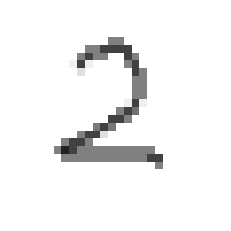

In [17]:
# PREDICTION
# load
# convert to grayscale
# invert colors and flat array
# predict (image is a 2)
image = Image.open('../models/data/test_img.png')
bwImage = image.convert('L')
arrayImage = numpy.invert(bwImage).ravel()
prediction = session.run(fetches = tensorflow.argmax(outputActivationValues, axis = 1),
                         feed_dict = {xTensor: [arrayImage]})
print('\nPrediction:', prediction)

# actual image
print('Actual Image:')
pyplot.imshow(image)
pyplot.gray()
pyplot.axis('off')
pyplot.show()

In [18]:
%%time


# EVALUATE MODEL
testAccuracy, testLoss = session.run(fetches = [accuracy, loss], feed_dict = {xTensor: xTest, yTensor: yTest})
print('METRICS ON TEST DATA')
print(f'Accuracy -> {round(testAccuracy * 100, 2)}')
print(f'Loss -> {round(testLoss, 2)}\n')

METRICS ON TEST DATA
Accuracy -> 86.86
Loss -> 1.590000033378601

CPU times: user 1.06 s, sys: 73.4 ms, total: 1.13 s
Wall time: 753 ms


In [19]:
%%time


# GET PREDICTIONS
predictions = session.run(fetches = tensorflow.argmax(outputActivationValues, axis = 1),
                          feed_dict = {xTensor: xTest})
print(f'Predictions Shape -> {predictions.shape}\n')

Predictions Shape -> (10000,)

CPU times: user 975 ms, sys: 144 ms, total: 1.12 s
Wall time: 645 ms


In [20]:
# GET FIRST TEN WRONG PREDICTIONS
counter = 0
wrongPredictionsIndexes = []
for index in range(len(predictions)):
    if predictions[index] != numpy.argmax(yTest[index]):
        wrongPredictionsIndexes.append(index)
        counter += 1
    if counter > 9:
        break

Model Prediction: 6
Actual Image (5):


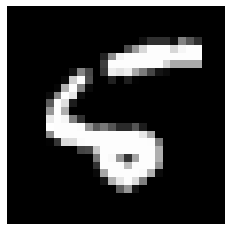

##########


Model Prediction: 0
Actual Image (4):


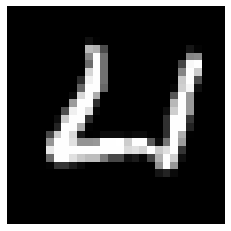

##########


Model Prediction: 7
Actual Image (5):


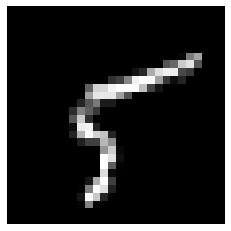

##########


Model Prediction: 2
Actual Image (8):


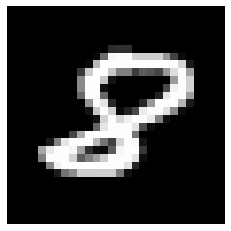

##########


Model Prediction: 4
Actual Image (9):


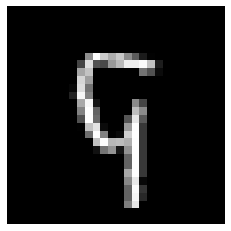

##########


Model Prediction: 2
Actual Image (3):


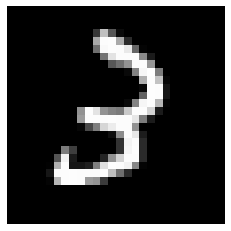

##########


Model Prediction: 0
Actual Image (6):


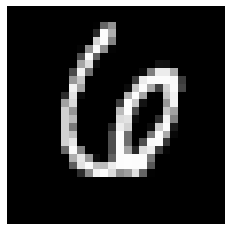

##########


Model Prediction: 8
Actual Image (9):


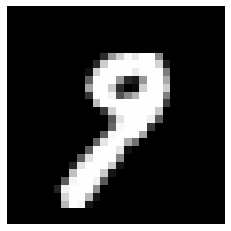

##########


Model Prediction: 7
Actual Image (2):


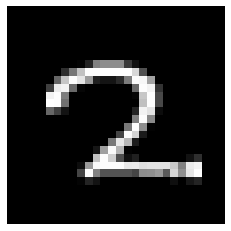

##########


Model Prediction: 5
Actual Image (8):


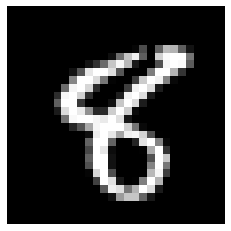

##########




In [21]:
# SHOW FIRST TEN WRONG PREDICTIONS
for index in wrongPredictionsIndexes:
    print(f'Model Prediction: {predictions[index]}')
    print(f'Actual Image ({numpy.argmax(yTest[index])}):')
    image = xTest[index].reshape(28, 28)
    pyplot.imshow(image)
    pyplot.gray()
    pyplot.axis('off')
    pyplot.show()
    print('##########\n\n')

In [22]:
# SAVING
savedOutputs = {'accuracy/modelPrediction': modelPrediction}
savedInputs = {'xTensor': xTensor}
tensorflow.compat.v1.saved_model.simple_save(session, MODEL_BACKUP_PATH, savedInputs, savedOutputs)

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ../models/tf-model/saved-model-tf/saved_model.pb


In [23]:
# CLOSING SESSION
trainFilewriter.close()
validationFilewriter.close()
session.close()
tensorflow.compat.v1.reset_default_graph()